### **Importing The Libraries**

In [1]:
#importing the important libraries, for the purpose of the assignment we will be limiting ourselves to the use of these libraries.
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [2]:
#importing warnings, effectively manages and addresses potential issues in the code, ensuring it is robust, maintainable, and compatible with future updates.
import warnings
warnings.filterwarnings('ignore')

### **Understanding The Dataset**

In [3]:
#reading the dataset, the reason why I'm using ldata as my name is to keep it simple while calling as well as easy to remember, l for Leads
ldata= pd.read_csv('Leads.csv')

#doing this step so that I can effectively see all columns in my dataset at once, along with the ability to glance the values in each column
pd.options.display.max_columns = None

#displaying the entire dataframe at once for the top 5 entries
ldata.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


This step helped us briefly see the way the dataset is structured and the contents.

In [4]:
#calculating the total number of rows and columns in the dataset
ldata.shape

(9240, 37)

We can see that we have around 37 different columns and 9240 entries in our dataset.

In [5]:
#understanding the different features we have in our dataset
ldata.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
#printing summary statistics for the numerical columns in the dataset, our target column 'Converted' will also feature here 
ldata.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#let's generate a summary of the dataset using the info function
ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As we can see, there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Additionally, there are numerous null values that will need to be addressed appropriately.

###  Data Processing

In [8]:
#checking for duplicate values
if ldata.duplicated().any():
    print("Duplicate rows found.")
    print(ldata[ldata.duplicated()])
else:
    print("No duplicate rows found.")

No duplicate rows found.


We have no duplicate entries, let's check for missing values now.

In [9]:
#checking for null values present in the dataset
ldata.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

We can see that there are several columns in our dataframe with a high number of missing values. With around 9000+ rows, some of these columns have over 3000 missing values, which accounts for almost 30% of the column. Upon reviewing the data dictionary, we have determined that these columns are not useful. Therefore, we will proceed to remove these columns from our dataframe.

In [10]:
#dropping all the columns in which we have more than 3000 missing values
for col in ldata.columns:
    missing_count = ldata[col].isnull().sum()
    if missing_count > 3000:
        print(f"Dropping column '{col}' with {missing_count} missing values.")
        ldata.drop(col, axis=1, inplace=True)

Dropping column 'Tags' with 3353 missing values.
Dropping column 'Lead Quality' with 4767 missing values.
Dropping column 'Asymmetrique Activity Index' with 4218 missing values.
Dropping column 'Asymmetrique Profile Index' with 4218 missing values.
Dropping column 'Asymmetrique Activity Score' with 4218 missing values.
Dropping column 'Asymmetrique Profile Score' with 4218 missing values.


In [11]:
#checking for null values again in the dataframe
ldata.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

We can see that both the City and Country columns have a high number of missing values. In my opinion, as X education is an online learning platform, their target audience isn't limited to a specific city or country. They get students from all over, so it shouldn't be a deciding factor. Therefore, we'll drop it.

In [12]:
#dropping City and Country columns
ldata.drop(['City','Country'], axis = 1, inplace = True)

#printing the first 3 rows of the dataframe to check whether the columns have been dropped
ldata.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened


To streamline our model, we will eliminate columns that are not relevant to our analysis. Clearly, the variables Prospect ID and Lead Number will not be of any use in the analysis, so it is best that we drop these two variables.

In [13]:
#dropping Prospect ID and Lead Number columns
ldata.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

#printing the first 3 rows of the dataframe to check whether the columns have been dropped
ldata.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened


In [14]:
#checking the percentage of missing values in each column
round(100*(ldata.isnull().sum()/len(ldata.index)), 2).sort_values(ascending=False)

Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Search                                            0.00
Newspaper 

We can observe that the proportion of missing values is less than 30% for all columns. However, some columns contain a level called 'Select', indicating that the student did not choose an option for that particular column, resulting in the display of 'Select'. These 'Select' values are essentially equivalent to missing values, so we need to determine the count of 'Select' values in all the columns where it is present.

In [15]:
#let's see the composition of all our categorical columns using value_counts()
for col in ldata.columns:
    print(ldata[col].astype('category').value_counts())
    print("__________________________________________________")

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
__________________________________________________
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
__________________________________________________
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
__________________________________________________
Do

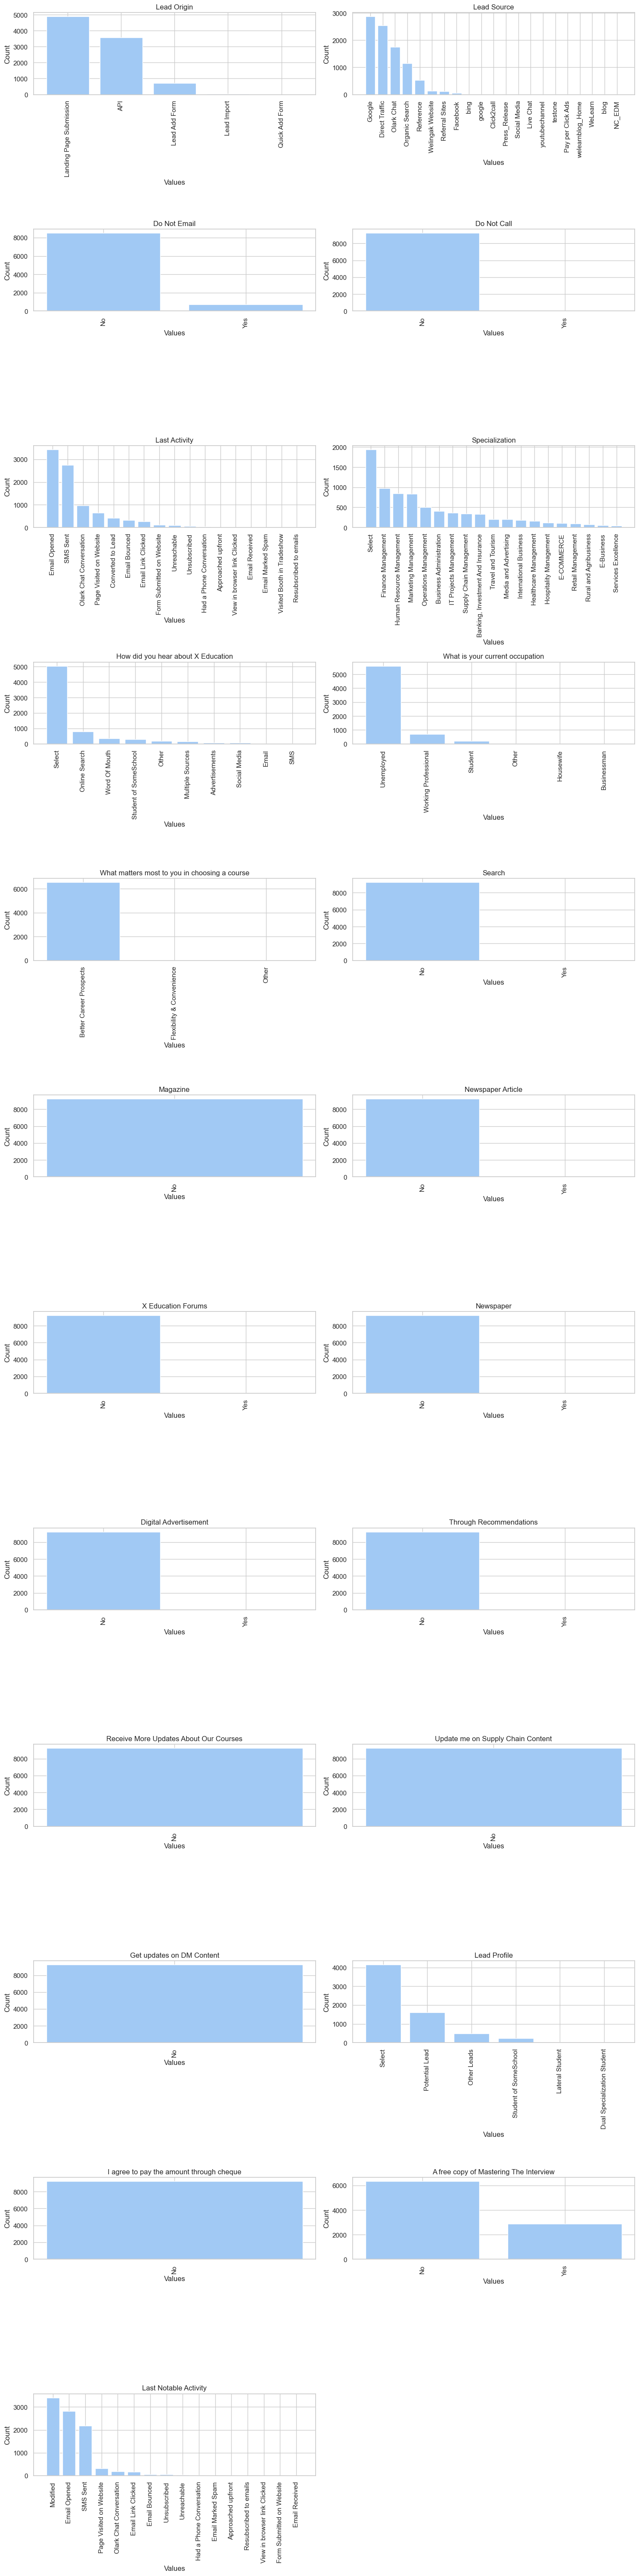

In [16]:
#let's visualize the composition for better understanding

#selecting object columns
object_columns = ldata.select_dtypes(include=['object']).columns

#setting up the subplot grid
num_cols = 2  #adjusting the number of columns in the subplot as needed
num_rows = (len(object_columns) + num_cols - 1) // num_cols  #calculating number of rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  #flattening the axes array for easy indexing

#creating bar plots for each object column
for i, col in enumerate(object_columns):
    value_counts = ldata[col].value_counts()
    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_title(col)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('Values')
    axes[i].tick_params(axis='x', rotation=90)  #rotating x labels for better visibility

#hiding any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  #adjusting layout to prevent overlap
plt.show()

#### Dropping Columns
- The columns 'How did you hear about X Education', and 'Lead Profile' mostly contain the value 'Select', which is equivalent to missing data. Therefore, we will drop these columns. The 'Specialization' column has 'Select' values as well but we won't drop it as it is an important variable.

- There are several columns where only one value is predominantly present for all the data points. These include 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', and 'I agree to pay the amount through cheque'. Since almost all the values for these variables are 'No', it's best to drop these columns as they won't contribute to our analysis.

- Additionally, the variable 'What matters most to you in choosing a course' has the level 'Better Career Prospects' 6528 times, while the other two levels appear only once and twice respectively. Therefore, we drop this column as well.

In [17]:
#dropping columns as discussed
dropped_columns =['How did you hear about X Education', 'Lead Profile', 'Do Not Call', 'Search', 'Magazine',
                  'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
                  'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 
                  'I agree to pay the amount through cheque','What matters most to you in choosing a course']
ldata.drop(dropped_columns, axis = 1, inplace = True)

#printing first few rows of the dataframe
ldata.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [18]:
#checking the number of null values again
ldata.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Currently, there are many null values in the 'What is your current occupation' column. While we could simply drop the entire row, we have already lost numerous feature variables. Therefore, we choose not to drop it, as it could be significant in the analysis. Instead, we will only drop the null rows for the 'What is your current occupation' column. This way, we can retain as much valuable data as possible while ensuring the accuracy of our analysis.

In [19]:
#dropping rows with missing values for the 'What is your current occupation' column 
ldata = ldata[~pd.isnull(ldata['What is your current occupation'])]

#checking for missing values again
ldata.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Since the number of null values in the columns is now quite small, we can simply drop the rows where these null values are present.

In [20]:
#dropping rows with null values
ldata.dropna(inplace= True)

#checking number of rows and columns left post our processing
ldata.shape

(6373, 12)

### Outlier Analysis
- Let's use Clipping to remove any outliers from our dataframe that may affect our scaling.

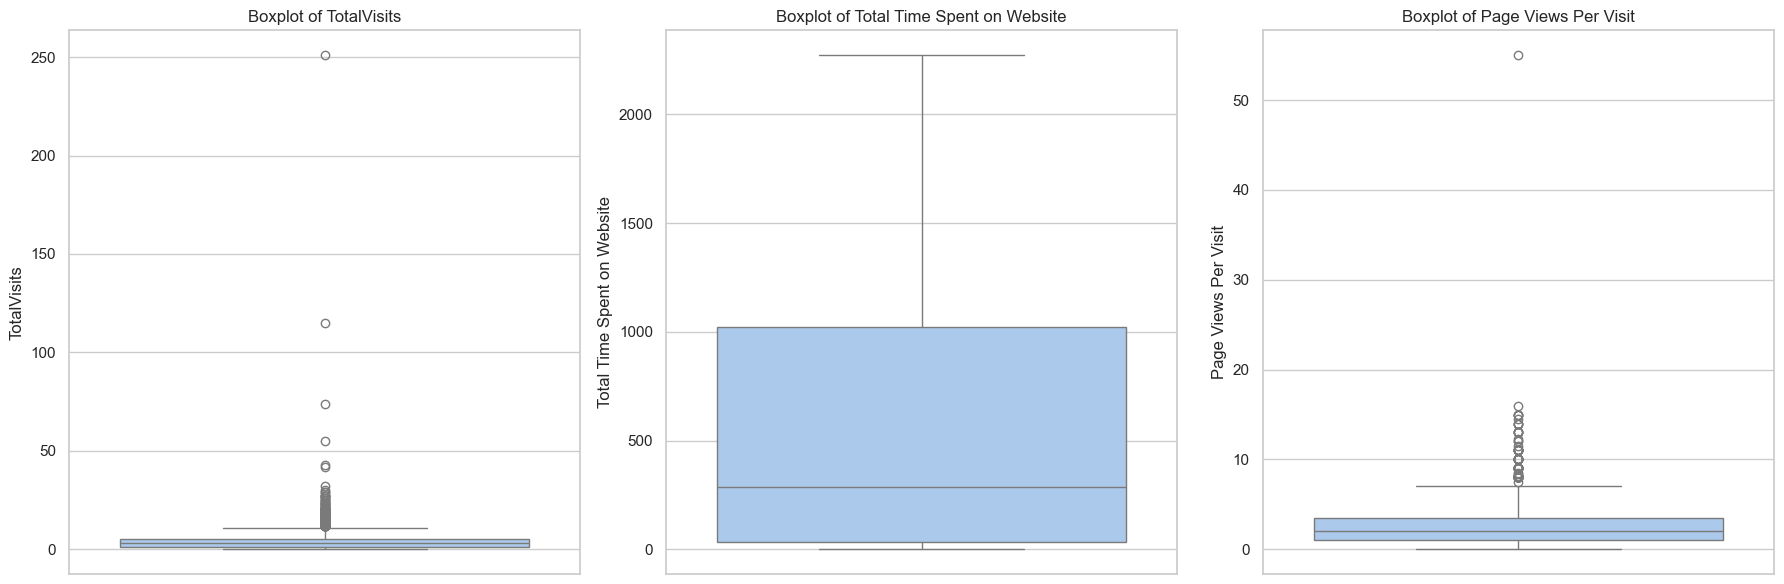

In [21]:
#Creating Boxplots to check for outliers

#setting up the figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define the columns
columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Create a boxplot for each column
for i, col in enumerate(columns):
    sns.boxplot(y=ldata[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

# Display the boxplots
plt.tight_layout()
plt.show()

We can see that 'TotalVisits' and 'Pages Views Per Visit' have some outliers, let's remove those entries using clipping.

In [22]:
#setting upper and lower limits using Clipping method
ldata['TotalVisits'] = ldata['TotalVisits'].clip(lower=ldata['TotalVisits'].quantile(0.05), upper=ldata['TotalVisits'].quantile(0.95))
ldata['Page Views Per Visit'] = ldata['Page Views Per Visit'].clip(lower=ldata['Page Views Per Visit'].quantile(0.05), upper=ldata['Page Views Per Visit'].quantile(0.95))


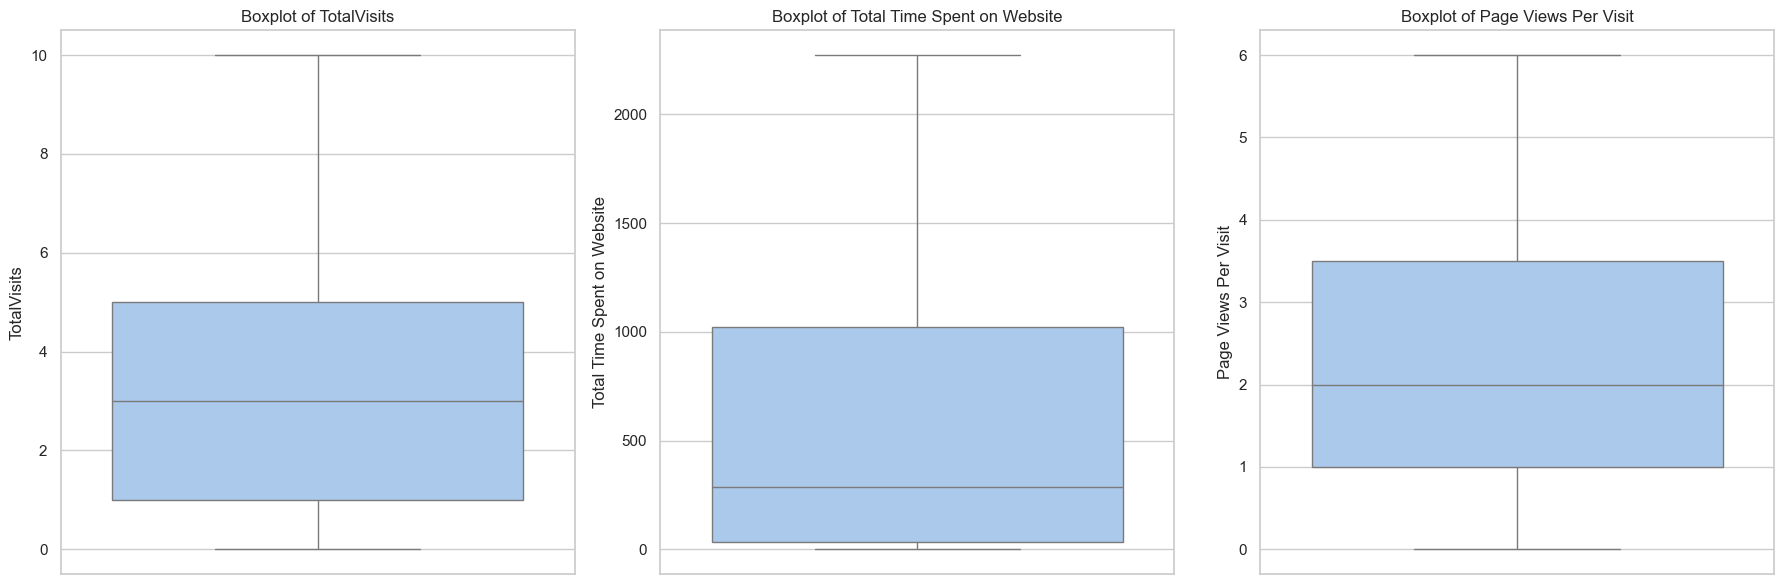

In [23]:
#creating Boxplots to check if outliers have been contained

#setting up the figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define the columns
columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Create a boxplot for each column
for i, col in enumerate(columns):
    sns.boxplot(y=ldata[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

# Display the boxplots
plt.tight_layout()
plt.show()

In [24]:
#checking the proportion of dataframe that we have retained, we originally had 9240 rows
print(len(ldata.index)/9240)

0.6897186147186147


We have retained approximately 69% of our dataframe, which is quite satisfactory.

### Preparing Data for Modelling
- To prepare the data for modeling,The next step is to address the categorical variables in the dataset. First, identify which variables are categorical and then create dummy variables for them.
- This ensures that the model treats these categories as unordered factors without assigning any hierarchical importance.

In [25]:
#extract the list of all categorical columns
ldata.select_dtypes(include='object').columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [26]:
#creating dummy variables and drop the first level to avoid multicollinearity
ldata = pd.get_dummies(ldata, columns =['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity'], drop_first=True, dtype=int)

#displaying the first few rows of the dataframe
ldata.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,Select,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,Select,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Business Administration,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Media and Advertising,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,Select,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


To handle the 'Specialization' variable, a dummy variable needs to be created. The level 'Select' is not useful and will be dropped explicitly. Instead of using drop_first = True, the entire 'Select' column will be dropped instead after creating dummies.

In [27]:
#dummy creation for 'Specialization' column
special_dummies = pd.get_dummies(ldata['Specialization'], prefix = 'Specialization')

#dropping the 'Select' dummy column
special_dummies = special_dummies.drop(['Specialization_Select'], axis= 1)

#joining it to the original dataframe
ldata = pd.concat([ldata, special_dummies], axis = 1)

#dropping 'Specialization' column as we now have created dummies for it
ldata.drop('Specialization', axis =1, inplace = True)

#displaying the first few rows of our dataframe
ldata.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Scaling the Dataset
- We will split our dataset into training and testing data. 
- We will only scale the numerical variables and not the categorical variables with dummies.
- We will use MinMaxScaler, MinMaxScaler transforms features by scaling each feature to a given range, usually between 0 and 1.
- We do not scale y_train or y_test. The target variable 'Converted' is left in its original scale to maintain interpretability and because the scaling of features is intended to ensure that all features are on a comparable range for model training purposes. The target variable itself should reflect the true counts to be predicted by the model.

In [28]:
#list of numeric columns to scale, excluding the target variable 'cnt'
numeric_columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#separating the features (X) and the target variable (y)
X = ldata.drop(columns='Converted')
y = ldata['Converted']

#splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#initializing MinMaxScaler
scaler = MinMaxScaler()

#scaling the numeric columns in the train set
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

#scaling the numeric columns in the test set (using the same scaler fitted on train data)
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [29]:
#verifying the scaling
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
7656,0.6,0.154930,1.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
8843,0.3,0.752201,0.500000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8720,1.0,0.091109,0.541667,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4979,0.4,0.378961,0.666667,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1400,0.2,0.705546,0.333333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
#let's display the correlation matrix for our dataframe to see which variables are highly correlated 
ldata.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005226,0.313338,-0.068701,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,0.018407,-0.044348,-0.034223,-0.012059,-0.012059,0.243200,-0.023501,0.000676,0.013015,0.144864,-0.006411,-0.012059,-0.148451,-0.138834,-0.134838,-0.033557,0.018407,-0.022391,0.018407,-0.036322,0.041575,-0.164168,-0.087121,0.285854,-0.021383,-0.032757,-0.011583,-0.012059,0.039068,0.011575,-0.034491,-0.259722,0.304859,-0.094833,-0.052371,-0.026291,0.018407,-0.010199,0.013015,0.046969,-0.239572,-0.039205,-0.032219,0.284301,0.050436,-0.026673,-0.012059,0.036229,0.014468,-0.017955,-0.015443,0.027078,0.028249,-0.006080,0.025865,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005226,1.000000,0.354865,0.753921,0.432941,-0.351438,-0.071282,0.102839,-0.069437,0.188543,-0.021250,-0.414891,0.306471,-0.001512,0.012001,-0.304296,0.085186,-0.005324,-0.006016,-0.162374,-0.005220,0.007497,-0.001343,-0.113060,-0.060326,-0.019429,0.004232,0.048115,0.013788,0.013505,0.027548,-0.122770,0.205274,-0.030855,0.026968,0.008983,0.019503,0.002993,-0.012050,0.038382,-0.043714,0.031971,-0.018153,0.281225,-0.013852,0.003500,0.004232,0.066409,0.012001,0.035809,-0.130505,-0.012218,0.192894,-0.015156,0.011174,0.008592,0.021010,0.067345,0.060309,0.028648,0.036055,0.069528,0.040371,0.027634,0.059758,0.039415,0.052842,0.013208,0.063265,0.030744,0.024025,0.042499,0.026724,0.053227,0.107154
Total Time Spent on Website,0.313338,0.354865,1.000000,0.355189,0.275606,-0.249493,-0.061429,0.114088,-0.060

From the matrix, we can see that there are some variables that are positively correlated and some that are negatively correlated with others. Let's build our model to understand it better

### Building the Model
- We will be fitting a logistic regression through the training data using statsmodels.
- When it comes to statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, it will fit a regression line passing through the origin, by default.
- There are numerous variables in the dataset that we need to handle. To address this, we will use RFE to select a small set of features from this pool of variables.

In [31]:
#importing RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 

#let's import variance_inflation_factor to check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

#running RFE with the output number of variables equal to 15
lr = LogisticRegression()
lr.fit(X_train, y_train)
rfe = RFE(estimator=lr,n_features_to_select= 15)              
rfe = rfe.fit(X_train, y_train)

#displaying the output in a table
table_rfe =pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=["Feature","support","Rank"])
table_rfe.sort_values(by="Rank",ascending=True)

,Feature,support,Rank
22,Last Activity_Converted to Lead,True,1
1,Total Time Spent on Website,True,1
48,Last Notable Activity_Had a Phone Conversation,True,1
41,What is your current occupation_Working Profes...,True,1
4,Lead Origin_Lead Add Form,True,1
...,...,...,...
19,Lead Source_bing,False,56
52,Last Notable Activity_SMS Sent,False,57
13,Lead Source_Press_Release,False,58
47,Last Notable Activity_Email Received,False,59


In [32]:
#selecting columns based of RFE that we performed
selected_features= X_train.columns[rfe.support_]
selected_features

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [33]:
#using our selected feature for model creation 
X_train_rfe = X_train[selected_features]
X_train_rfe.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
7656,0.154930,0,0,0,0,1,0,0,1,0,0,1,0,0,0
8843,0.752201,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8720,0.091109,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4979,0.378961,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1400,0.705546,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
#let's define function so we don't have to keep repeating the same code again and again

#function for fitting the model
def log_model(X,y):
    X = sm.add_constant(X) #adding a constant column 
    log = sm.GLM(y,X, family = sm.families.Binomial())
    lm = log.fit() #fitting logistic regression model using statsmodels
    print(lm.summary()) #let's see the summary of how the model performed
    return X

#function to check VIF for the model
def VIF_check(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model 1: Using RFE

In [35]:
#building model using the 15 shortlisted features
log1_summary = log_model(X_train_rfe, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2054.8
Date:                Tue, 24 Sep 2024   Deviance:                       4109.5
Time:                        17:51:59   Pearson chi2:                 4.49e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3707
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

We can see that there are quite some variables with a p-value greater than 0.05. Let's also look at the VIF before we choose to drop a variable.

In [36]:
#checking VIF for the model
VIF_check(X_train_rfe)

,Features,VIF
1,Lead Origin_Lead Add Form,80.01
3,Lead Source_Reference,61.16
4,Lead Source_Welingak Website,20.10
11,What is your current occupation_Unemployed,3.45
0,Total Time Spent on Website,2.37
8,Last Activity_SMS Sent,1.71
12,What is your current occupation_Working Profes...,1.51
2,Lead Source_Olark Chat,1.49
7,Last Activity_Olark Chat Conversation,1.24
6,Last Activity_Converted to Lead,1.11


We can see that for the 'Lead Origin_Lead Add Form', 'Lead Source_Reference', 'Lead Source_Welingak Website' the VIF values are really high. The other variables have a value less than 5 which is acceptable. We will drop 'Lead Origin_Lead Add Form' as it has a high VIF as well as high p-value.

### Model 2
- Removing the variable 'Lead Origin_Lead Add Form' based on its high p-value and VIF value

In [37]:
#dropping the column 'Lead Origin_Lead Add Form' from  'X_train_rfe'
X_train_rfe.drop(['Lead Origin_Lead Add Form'], axis=1, inplace=True)

#fitting the model
log2_summary = log_model(X_train_rfe, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2055.1
Date:                Tue, 24 Sep 2024   Deviance:                       4110.2
Time:                        17:51:59   Pearson chi2:                 4.49e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3706
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [38]:
#checking VIF for the model
VIF_check(X_train_rfe)

,Features,VIF
10,What is your current occupation_Unemployed,3.45
0,Total Time Spent on Website,2.37
7,Last Activity_SMS Sent,1.71
11,What is your current occupation_Working Profes...,1.51
1,Lead Source_Olark Chat,1.49
2,Lead Source_Reference,1.25
6,Last Activity_Olark Chat Conversation,1.24
5,Last Activity_Converted to Lead,1.11
9,What is your current occupation_Student,1.11
4,Do Not Email_Yes,1.10


The VIFs are all under 5 now, so we'll drop 'Last Notable Activity_Had a Phone Conversation' which has the highest p-value of 0.999.

### Model 3
- Removing the variable 'Last Notable Activity_Had a Phone Conversation' based on its high p-value

In [39]:
#dropping the column 'Last Notable Activity_Had a Phone Conversation' from  'X_train_rfe'
X_train_rfe.drop(['Last Notable Activity_Had a Phone Conversation'], axis=1, inplace=True)

#fitting the model
log3_summary = log_model(X_train_rfe, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2065.3
Date:                Tue, 24 Sep 2024   Deviance:                       4130.7
Time:                        17:51:59   Pearson chi2:                 4.50e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [40]:
#checking VIF for the model
VIF_check(X_train_rfe)

,Features,VIF
10,What is your current occupation_Unemployed,3.45
0,Total Time Spent on Website,2.37
7,Last Activity_SMS Sent,1.70
11,What is your current occupation_Working Profes...,1.51
1,Lead Source_Olark Chat,1.49
2,Lead Source_Reference,1.25
6,Last Activity_Olark Chat Conversation,1.24
5,Last Activity_Converted to Lead,1.11
9,What is your current occupation_Student,1.11
4,Do Not Email_Yes,1.10


The VIFs are still under 5 now, so we'll drop 'What is your current occupation_Housewife' which has the highest p-value of 0.999.

### Model 4
- Removing the variable 'What is your current occupation_Housewife' based on its high p-value

In [41]:
#dropping the column 'What is your current occupation_Housewife' from  'X_train_rfe'
X_train_rfe.drop(['What is your current occupation_Housewife'], axis=1, inplace=True)

#fitting the model
log4_summary = log_model(X_train_rfe, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2067.3
Date:                Tue, 24 Sep 2024   Deviance:                       4134.7
Time:                        17:51:59   Pearson chi2:                 4.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3671
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [42]:
#checking VIF for the model
VIF_check(X_train_rfe)

,Features,VIF
9,What is your current occupation_Unemployed,3.44
0,Total Time Spent on Website,2.37
7,Last Activity_SMS Sent,1.70
10,What is your current occupation_Working Profes...,1.51
1,Lead Source_Olark Chat,1.49
2,Lead Source_Reference,1.25
6,Last Activity_Olark Chat Conversation,1.24
5,Last Activity_Converted to Lead,1.11
8,What is your current occupation_Student,1.11
4,Do Not Email_Yes,1.10


The VIFs are still under 5 now, so we'll drop 'What is your current occupation_Working Professional' which has the highest p-value comparatively and is less important than other variables.

### Model 5
- Removing the variable 'What is your current occupation_Working Professional' based on its high p-value

In [43]:
#dropping the column 'What is your current occupation_Working Professional' from  'X_train_rfe'
X_train_rfe.drop(['What is your current occupation_Working Professional'], axis=1, inplace=True)

#fitting the model
log5_summary = log_model(X_train_rfe, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.2
Date:                Tue, 24 Sep 2024   Deviance:                       4138.5
Time:                        17:51:59   Pearson chi2:                 4.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3666
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [44]:
#checking VIF for the model
VIF_check(X_train_rfe)

,Features,VIF
9,What is your current occupation_Unemployed,2.73
0,Total Time Spent on Website,1.93
7,Last Activity_SMS Sent,1.58
1,Lead Source_Olark Chat,1.42
6,Last Activity_Olark Chat Conversation,1.23
2,Lead Source_Reference,1.10
4,Do Not Email_Yes,1.09
5,Last Activity_Converted to Lead,1.09
8,What is your current occupation_Student,1.08
3,Lead Source_Welingak Website,1.07


#### Inference:
- Our VIF is contained within the limits of 5 so there is no multicollinearity.
- And all p-values are under 0.05 so we'll move on to the next step of Model Evaluation.

### **Model Evaluation**
- Now that VIFs are under 5 and p-values are also below 0.05 let's go ahead and make predictions using this final set of features that we have obtained.

In [45]:
#using 'predict' to predict the probabilities on the train set

X_train_sm = sm.add_constant(X_train_rfe) 
log = sm.GLM(y_train ,X_train_sm, family = sm.families.Binomial())
lm = log.fit()

y_train_pred = lm.predict(sm.add_constant(X_train_rfe))
y_train_pred[:10]

7656    0.143970
8843    0.913563
8720    0.171311
4979    0.674940
1400    0.750745
1887    0.862889
6449    0.472070
6031    0.271959
124     0.763101
5844    0.389460
dtype: float64

In [46]:
#reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14396968, 0.91356332, 0.17131143, 0.67493978, 0.75074477,
       0.86288855, 0.47207009, 0.27195908, 0.76310055, 0.38945984])

In [47]:
#let us now create a new dataframe containing the actual conversion flag and the probabilities predicted by our model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.143970
1,0,0.913563
2,0,0.171311
3,1,0.674940
4,0,0.750745


**Let's choose 0.5 as the cutoff point, although this value is arbitrary.**

In [48]:
#Creating new column 'Predicted' with values eqaul to 1 if Conversion_Prob > 0.5 else it is 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.143970,0
1,0,0.913563,1
2,0,0.171311,0
3,1,0.674940,1
4,0,0.750745,1


It's time to evaluate our model, we have the probabilities and have also made conversion predictions using the probabilities. 

In [49]:
#let's create confusion matrix by importing metrics
from sklearn import metrics

#creating our confusion matrix
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_mat)

[[1931  398]
 [ 580 1552]]


This is how our confusion matrix would be interpreted

| Actual ↓ / Predicted →| not_convert | convert |
|-----------|-----------|-------|
| not_convert |    1931    |  398  |
| convert     |    580     | 1552  |


In [50]:
#checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7807666442501682


In [51]:
#defining function to evaluate other metrics as well

def print_confusion_matrix_metrics(confusion_matrix):
    # Extract values from the confusion matrix
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]

    # Calculate metrics
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * precision * recall / (precision + recall)
    specificity = TN / (TN + FP)

    # Print results with explanations
    print("Confusion Matrix Metrics:")
    print("-----------------------")
    print(f"True Positives (TP): {TP} - The number of times the model correctly predicts a customer will 'convert' when the actual outcome is indeed 'converted.'")
    print(f"True Negatives (TN): {TN} - The number of times the model correctly predicts a customer will 'not convert' when the actual outcome is indeed 'not converted.'")
    print(f"False Positives (FP): {FP} - The number of times the model incorrectly predicts a customer will 'convert' when the actual outcome is 'not converted.' (These are often referred to as 'false alarms' or 'type I errors.')")
    print(f"False Negatives (FN): {FN} - The number of times the model incorrectly predicts a customer will 'not convert' when the actual outcome is 'converted.' (These are often referred to as 'missed opportunities' or 'type II errors.')")
    print(f"Accuracy: {accuracy:.2f} - Overall correct predictions.")
    print(f"Precision: {precision:.2f} - Proportion of positive predictions that are actually positive.")
    print(f"Recall (Sensitivity): {recall:.2f} - Proportion of actual positives that were correctly predicted.")
    print(f"Specificity: {specificity:.2f} - Proportion of actual negatives that were correctly predicted.")
    print(f"F1-Score: {f1_score:.2f} - Harmonic mean of precision and recall.")

#let's use it on our matrix    
print_confusion_matrix_metrics(confusion_mat)

Confusion Matrix Metrics:
-----------------------
True Positives (TP): 1552 - The number of times the model correctly predicts a customer will 'convert' when the actual outcome is indeed 'converted.'
True Negatives (TN): 1931 - The number of times the model correctly predicts a customer will 'not convert' when the actual outcome is indeed 'not converted.'
False Positives (FP): 398 - The number of times the model incorrectly predicts a customer will 'convert' when the actual outcome is 'not converted.' (These are often referred to as 'false alarms' or 'type I errors.')
False Negatives (FN): 580 - The number of times the model incorrectly predicts a customer will 'not convert' when the actual outcome is 'converted.' (These are often referred to as 'missed opportunities' or 'type II errors.')
Accuracy: 0.78 - Overall correct predictions.
Precision: 0.80 - Proportion of positive predictions that are actually positive.
Recall (Sensitivity): 0.73 - Proportion of actual positives that were co

### Finding the Optimal Cutoff

- Previously, 0.5 was arbitrarily chosen to loosely evaluate the model performance. However, to obtain accurate results, it is necessary to optimize the threshold. So, let's begin by plotting an ROC curve to determine the AUC.

In [52]:
#fucntion to make roc curve

def roc_auc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )


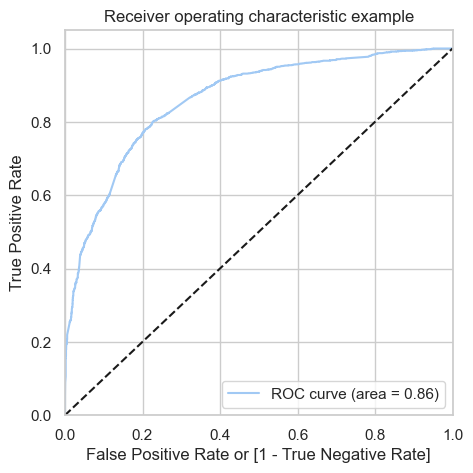

In [53]:
#calling the roc function to display the curve
roc_auc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The ROC curve has an area of 0.86, indicating a strong model. Let's now determine the optimal cutoff point by assessing sensitivity and specificity tradeoff.

In [54]:
#creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.143970,0,1,1,0,0,0,0,0,0,0,0
1,0,0.913563,1,1,1,1,1,1,1,1,1,1,1
2,0,0.171311,0,1,1,0,0,0,0,0,0,0,0
3,1,0.674940,1,1,1,1,1,1,1,1,0,0,0
4,0,0.750745,1,1,1,1,1,1,1,1,1,0,0


In [55]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.477920     1.000000     0.000000
0.1          0.1  0.555929     0.991557     0.157149
0.2          0.2  0.706568     0.939024     0.493774
0.3          0.3  0.752298     0.904784     0.612709
0.4          0.4  0.785698     0.800657     0.772005
0.5          0.5  0.780767     0.727955     0.829111
0.6          0.6  0.768886     0.664165     0.864749
0.7          0.7  0.739744     0.543621     0.919279
0.8          0.8  0.713069     0.447467     0.956204
0.9          0.9  0.647164     0.280488     0.982825


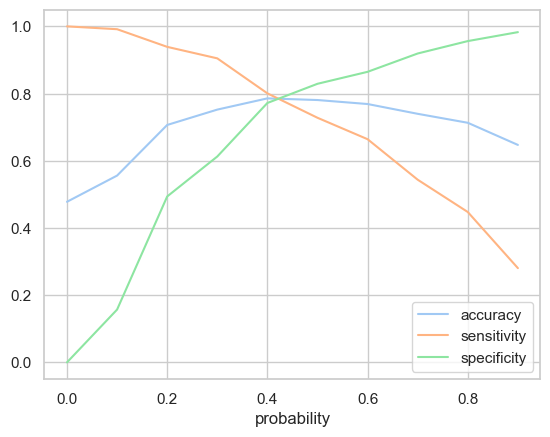

In [56]:
#plotting our graph
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

Around 0.42, we get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [57]:
#using 0.42 as optimal cutoff point
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.143970,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.913563,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.171311,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.674940,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.750745,1,1,1,1,1,1,1,1,1,0,0,1


In [58]:
#creating our confusion matrix
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion_mat)

[[1830  499]
 [ 461 1671]]


In [59]:
#checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.784801613987895


In [60]:
#evaluating other metrics using the function we defined       
print_confusion_matrix_metrics(confusion_mat)

Confusion Matrix Metrics:
-----------------------
True Positives (TP): 1671 - The number of times the model correctly predicts a customer will 'convert' when the actual outcome is indeed 'converted.'
True Negatives (TN): 1830 - The number of times the model correctly predicts a customer will 'not convert' when the actual outcome is indeed 'not converted.'
False Positives (FP): 499 - The number of times the model incorrectly predicts a customer will 'convert' when the actual outcome is 'not converted.' (These are often referred to as 'false alarms' or 'type I errors.')
False Negatives (FN): 461 - The number of times the model incorrectly predicts a customer will 'not convert' when the actual outcome is 'converted.' (These are often referred to as 'missed opportunities' or 'type II errors.')
Accuracy: 0.78 - Overall correct predictions.
Precision: 0.77 - Proportion of positive predictions that are actually positive.
Recall (Sensitivity): 0.78 - Proportion of actual positives that were co

With this level of acuuracy, this cutoff point seems good to go!

### Making Predictions Using Our Final Model
- With model assumptions satisfied, we can proceed to make predictions using the final model.
- We have already scaled the numeric columns in the test set (using the same scaler fitted on train data).

In [61]:
#selecting columns for X_test based of RFE that we performed
selected_features = X_train_rfe.columns
X_test = X_test[selected_features]

#displaying first few rows 
X_test.head()

,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
2828,0.297535,0,0,0,0,0,0,1,1,0,0
6562,0.014085,0,0,0,0,0,0,1,0,1,0
7468,0.538732,0,0,0,0,0,0,1,0,1,0
6337,0.211268,0,0,0,0,0,0,0,0,1,0
8566,0.298415,0,0,0,0,0,0,0,0,1,0


In [62]:
#fitting our model
X_train_sm = sm.add_constant(X_train_rfe) 
log = sm.GLM(y_train ,X_train_sm, family = sm.families.Binomial())
lm = log.fit()

#making predictions on the test set and storing it in the variable 'y_test_pred'
y_test_pred = lm.predict(sm.add_constant(X_test))

#displaying first 10 values
y_test_pred[:10]

2828    0.611911
6562    0.297286
7468    0.806467
6337    0.258751
8566    0.337936
338     0.131641
3940    0.512259
448     0.984640
7146    0.065947
4428    0.990344
dtype: float64

In [63]:
#converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

#displaying the first few rows
y_pred_1.head()

,0
2828,0.611911
6562,0.297286
7468,0.806467
6337,0.258751
8566,0.337936


In [64]:
#converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

#removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

#appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

#displaying first few rows of 'y_pred_final'
y_pred_final.head()

,Converted,0
0,1,0.611911
1,0,0.297286
2,0,0.806467
3,0,0.258751
4,1,0.337936


In [65]:
#renaming the column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

#displaying first few rows
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.611911
1,0,0.297286
2,0,0.806467
3,0,0.258751
4,1,0.337936


In [66]:
#makinfg predictions on the test set using 0.42 as the cutoff which was the optimal cutoff we received
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

#displaying first few rows
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.611911,1
1,0,0.297286,0
2,0,0.806467,1
3,0,0.258751,0
4,1,0.337936,0


In [67]:
#creating our confusion matrix
confusion_mat = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted)
print(confusion_mat)

[[784 195]
 [200 733]]


In [68]:
#checking the overall accuracy
print(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted))

0.7934100418410042


In [69]:
#evaluating other metrics using the function we defined   
print_confusion_matrix_metrics(confusion_mat)

Confusion Matrix Metrics:
-----------------------
True Positives (TP): 733 - The number of times the model correctly predicts a customer will 'convert' when the actual outcome is indeed 'converted.'
True Negatives (TN): 784 - The number of times the model correctly predicts a customer will 'not convert' when the actual outcome is indeed 'not converted.'
False Positives (FP): 195 - The number of times the model incorrectly predicts a customer will 'convert' when the actual outcome is 'not converted.' (These are often referred to as 'false alarms' or 'type I errors.')
False Negatives (FN): 200 - The number of times the model incorrectly predicts a customer will 'not convert' when the actual outcome is 'converted.' (These are often referred to as 'missed opportunities' or 'type II errors.')
Accuracy: 0.79 - Overall correct predictions.
Precision: 0.79 - Proportion of positive predictions that are actually positive.
Recall (Sensitivity): 0.79 - Proportion of actual positives that were corr

## Precision-Recall View

We will now also build the training model using the precision-recall view

In [70]:
#looking at our confusion matrix that we built with training data
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion_mat

array([[1931,  398],
       [ 580, 1552]], dtype=int64)

In [71]:
#defiing our parameters
TP = confusion_mat[1, 1]
TN = confusion_mat[0, 0]
FP = confusion_mat[0, 1]
FN = confusion_mat[1, 0]

In [72]:
#Precision
precision = TP / (TP + FP) 
print(f"Precision: {precision:.2f} - Proportion of positive predictions that are actually positive.")

Precision: 0.80 - Proportion of positive predictions that are actually positive.


In [73]:
#Recall
recall = TP / (TP + FN)
print(f"Recall (Sensitivity): {recall:.2f} - Proportion of actual positives that were correctly predicted.")

Recall (Sensitivity): 0.73 - Proportion of actual positives that were correctly predicted.


#### Precision and Recall tradeoff

In [74]:
#importing precision_recall_curve
from sklearn.metrics import precision_recall_curve

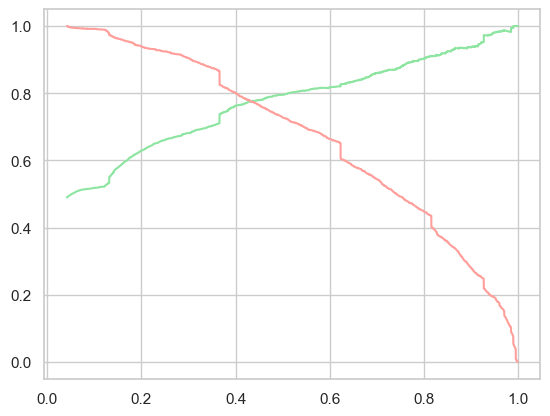

In [75]:
#let's plot our curve 
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [76]:
#Around 0.44, we get the optimal values of the two metrics. So let's choose 0.44 as our cutoff now.
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

#display the first few rows
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.143970,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.913563,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.171311,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.674940,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.750745,1,1,1,1,1,1,1,1,1,0,0,1


In [77]:
#creating our confusion matrix again
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion_mat)

[[1857  472]
 [ 487 1645]]


In [78]:
#checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.7850257789733244


In [79]:
#evaluating other metrics using the function we defined   
print_confusion_matrix_metrics(confusion_mat)

Confusion Matrix Metrics:
-----------------------
True Positives (TP): 1645 - The number of times the model correctly predicts a customer will 'convert' when the actual outcome is indeed 'converted.'
True Negatives (TN): 1857 - The number of times the model correctly predicts a customer will 'not convert' when the actual outcome is indeed 'not converted.'
False Positives (FP): 472 - The number of times the model incorrectly predicts a customer will 'convert' when the actual outcome is 'not converted.' (These are often referred to as 'false alarms' or 'type I errors.')
False Negatives (FN): 487 - The number of times the model incorrectly predicts a customer will 'not convert' when the actual outcome is 'converted.' (These are often referred to as 'missed opportunities' or 'type II errors.')
Accuracy: 0.79 - Overall correct predictions.
Precision: 0.78 - Proportion of positive predictions that are actually positive.
Recall (Sensitivity): 0.77 - Proportion of actual positives that were co

### Making Predictions on the Test Set
- Let's now make predicitons on the test set using the cutoff we got using precision-recall.

In [80]:
#fitting our model
X_train_sm = sm.add_constant(X_train_rfe) 
log = sm.GLM(y_train ,X_train_sm, family = sm.families.Binomial())
lm = log.fit()

#making predictions on the test set and storing it in the variable 'y_test_pred'
y_test_pred = lm.predict(sm.add_constant(X_test))

#displaying first 10 values
y_test_pred[:10]

2828    0.611911
6562    0.297286
7468    0.806467
6337    0.258751
8566    0.337936
338     0.131641
3940    0.512259
448     0.984640
7146    0.065947
4428    0.990344
dtype: float64

In [81]:
#converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

#converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

#removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

#appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

#displaying first few rows of 'y_pred_final'
y_pred_final.head()

,Converted,0
0,1,0.611911
1,0,0.297286
2,0,0.806467
3,0,0.258751
4,1,0.337936


In [82]:
#renaming the column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

#displaying first few rows
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.611911
1,0,0.297286
2,0,0.806467
3,0,0.258751
4,1,0.337936


In [83]:
#makinfg predictions on the test set using 0.44 as the cutoff which was the optimal cutoff we received
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

#displaying first few rows
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.611911,1
1,0,0.297286,0
2,0,0.806467,1
3,0,0.258751,0
4,1,0.337936,0


In [84]:
#creating our confusion matrix again
confusion_mat = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted)
print(confusion_mat)

[[804 175]
 [210 723]]


In [85]:
#checking the overall accuracy
print(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted))

0.7986401673640168


In [86]:
#evaluating other metrics using the function we defined   
print_confusion_matrix_metrics(confusion_mat)

Confusion Matrix Metrics:
-----------------------
True Positives (TP): 723 - The number of times the model correctly predicts a customer will 'convert' when the actual outcome is indeed 'converted.'
True Negatives (TN): 804 - The number of times the model correctly predicts a customer will 'not convert' when the actual outcome is indeed 'not converted.'
False Positives (FP): 175 - The number of times the model incorrectly predicts a customer will 'convert' when the actual outcome is 'not converted.' (These are often referred to as 'false alarms' or 'type I errors.')
False Negatives (FN): 210 - The number of times the model incorrectly predicts a customer will 'not convert' when the actual outcome is 'converted.' (These are often referred to as 'missed opportunities' or 'type II errors.')
Accuracy: 0.80 - Overall correct predictions.
Precision: 0.81 - Proportion of positive predictions that are actually positive.
Recall (Sensitivity): 0.77 - Proportion of actual positives that were corr

## Conclusion

The final model, a **Generalized Linear Model (GLM)** with a logit link function, has demonstrated strong performance in predicting customer conversions. Based on the summary of model coefficients, several key factors significantly impact conversion likelihood, with high statistical significance (p-values < 0.05 for all variables). These include **Total Time Spent on Website**, **Lead Source (Olark Chat, Reference, Welingak Website)**, and **Last Activity (SMS Sent, Unreachable)**. Conversely, factors like **Do Not Email**, **Last Activity (Converted to Lead, Olark Chat Conversation)**, and **current occupation as Student or Unemployed** have a negative influence on conversion.

### Model Performance Evaluation:
Two different cutoff values were tested using the **AUC ROC curve** and **Precision-Recall curve**, both leading to slightly different evaluation metrics.

1. **Evaluation using ROC AUC Curve:**
   - **Accuracy**: 79%
   - **Precision**: 79%
   - **Recall (Sensitivity)**: 79%
   - **Specificity**: 80%
   - **F1-Score**: 79%

   This cutoff provided a balanced trade-off between precision and recall. The model was able to correctly predict **733 true positives (converted customers)** and **784 true negatives (non-converted customers)**. However, it produced **195 false positives** and **200 false negatives**.

2. **Evaluation using Precision-Recall Curve:**
   - **Accuracy**: 80%
   - **Precision**: 81%
   - **Recall (Sensitivity)**: 77%
   - **Specificity**: 82%
   - **F1-Score**: 79%

   Using this cutoff, the model slightly improved in terms of overall accuracy (80%) and precision (81%), but had a marginal decrease in recall (77%). The **trade-off here** is favoring precision over recall, resulting in fewer false positives (175) but a slight increase in false negatives (210).

### Conclusion on Model:
Both evaluations show that the model achieves good balance across precision, recall, and accuracy. However, when using the cutoff from the precision-recall curve, the model favors minimizing false alarms (FP) while accepting a slight increase in missed opportunities (FN). This could be beneficial for business scenarios where precision is prioritized, such as avoiding unnecessary marketing efforts on non-converting customers.

In summary, the model is effective for predicting customer conversions, with robust performance metrics, and can be fine-tuned depending on whether the business prefers minimizing false positives or false negatives.


### Thank you!